# Nhóm 6: Dữ liệu Covid_19

| Thành viên|      MSSV     |   Tên                 |
|-----------|:-------------:|----------------------:|
| $1$       |  $20001955$   | Trương Văn Thông      |
| $2$       |  $20123531$   |   Nguyễn Chí Nguyện   |
| $3$       |  $20047711$   |   Hoàng Thị Ánh Dương |
| $4$       |  $20101671$   | Võ Hoàng Minh Trí     |
| $5$       |  $20057571$   |   Trần Quốc Bảo       |

# Giới thiệu bộ dữ liệu:

**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

## Load data:
### Link tải bộ data:
- [Dữ liệu trường hợp xác nhận](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
- [Dữ liệu tỷ lệ tử vong](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)
- [Dữ liệu tỷ lệ phục hồi](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)

In [1]:
# Cài các thư viện
#!pip install pycountry_convert 
#!pip install folium
#!pip install plotly

In [2]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import plotly.express as px
import seaborn as sns


plt.style.use('fivethirtyeight')

#### Đọc dữ liệu online từ GitHub

In [3]:
# # Dữ liệu toàn cầu

# # Trường hợp xác nhận
# confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# # Tỷ lệ tử vong
# deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# # Tỷ lệ phục hồi
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


#### Đọc dữ liệu từ máy

In [4]:
# Trường hợp xác nhận
confirmed_df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')

# Tỷ lệ tử vong
deaths_df = pd.read_csv('data/time_series_covid19_deaths_global.csv')

# Tỷ lệ phục hồi
recoveries_df = pd.read_csv('data/time_series_covid19_recovered_global.csv')

In [5]:
# Xem data Trường hợp xác nhận
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/22,11/2/22,11/3/22,11/4/22,11/5/22,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,203167,203265,203395,203497,203574,203681,203829,203942,204094,204287
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,332969,332996,332996,333027,333046,333055,333058,333071,333088,333103
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270839,270840,270847,270856,270862,270873,270881,270891,270906,270917
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46535,46588,46588,46588,46588,46588,46588,46588,46664,46664
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [6]:
# Xem data Tỉ lệ tử vong
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/22,11/2/22,11/3/22,11/4/22,11/5/22,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7823,7823,7825,7825,7826,7826,7828,7829,7829,7829
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3593,3593,3593,3593,3593,3593,3593,3593,3593,3593
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [7]:
# Xem data Tỉ lệ phục hồi
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/22,11/2/22,11/3/22,11/4/22,11/5/22,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tập dữ liệu này được cập nhật hàng ngày bởi `Johns Hopkins CSSE`. Tuy nhiên trong project này, nhóm tụi em chỉ xử lý từ ngày đầu đến ngày $8/4/2021$

In [8]:
confirmed_df = confirmed_df.loc[:,:'8/4/21']
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [9]:
deaths_df = deaths_df.loc[:,:'8/4/21']
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [10]:
recoveries_df = recoveries_df.loc[:,:'8/4/21']
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


## $\color{red}{\text{TASK 1:Tìm hiểu dữ liệu:}}$

###  Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của $3$ bộ dữ liệu

In [11]:
date_Start_confirm = confirmed_df.columns.to_list()[4]
date_Start_confirm

'1/22/20'

In [12]:
date_Start_death = deaths_df.columns.to_list()[4]
date_Start_death

'1/22/20'

In [13]:
date_Start_recoveries_df = recoveries_df.columns.to_list()[4]
date_Start_recoveries_df

'1/22/20'

### Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu

In [14]:
date_End_confirm = confirmed_df.columns.to_list()[-1]
date_End_confirm

'8/4/21'

In [15]:
date_End_death = deaths_df.columns.to_list()[-1]
date_End_death

'8/4/21'

In [16]:
date_End_recoveries_df = recoveries_df.columns.to_list()[-1]
date_End_recoveries_df

'8/4/21'

### Xác định có bao nhiêu quốc gia trong tập dữ liệu

In [17]:
confirmed_df_country = confirmed_df['Country/Region'].count()
confirmed_df_country

289

In [18]:
deaths_df_country = deaths_df['Country/Region'].count()
deaths_df_country

289

In [19]:
recovered_df_country = recoveries_df['Country/Region'].count()
recovered_df_country

274

### Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu không

In [20]:
duplicated_confirm = confirmed_df[confirmed_df['Country/Region'].duplicated()]
duplicated_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,8118,8294,8531,8703,8915,9153,9360,9562,9795,10063
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,192,192,197,197,197,199,200,200,198,198
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1770,1790,1791,1793,1800,1809,1824,1840,1859,1886
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,856,857,859,859,859,859,862,863,866,866
14,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,235


In [21]:
duplicated_death = deaths_df[deaths_df['Country/Region'].duplicated()]
duplicated_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,66,65,67,67,68,68,69,69,71,76
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
14,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


In [22]:
duplicated_recoveries = recoveries_df[recoveries_df['Country/Region'].duplicated()]
duplicated_recoveries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,189,190,190,190,191,191,191,191,193,193
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1715,1717,1717,1720,1720,1725,1727,1727,1727,1727
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,826,827,827,829,829,830,830,831,835,841
14,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,221,221,221,221,221,221,221,221,221,221


### Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố

In [23]:
confirmed_df['Country/Region'].str.title().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua And Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote D'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [24]:
recoveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


## $\color{red}{\text{TASK 2: Phân tích toàn cầu:}}$

### Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong,tổng số ca phục hồi và số ca còn mắc Covid theo thời gian (đơn vị ngày)

In [25]:
cols = confirmed_df.keys()

confirm = confirmed_df.loc[:, cols[4]:cols[-1]]
death = deaths_df.loc[:, cols[4]:cols[-1]]
recorveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirm.keys()

total_case = []
total_death = []
total_recorveries = []
total_active = []

dates = confirmed_df.columns.to_list()[4:]
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# Total case per date
total_confirm_daily = confirmed_df.iloc[:,4:].sum()
total_death_daily = deaths_df.iloc[:,4:].sum()
total_recorveries_daily = recoveries_df.iloc[:,4:].sum()

# Total case
total_case = total_confirm_daily.values
total_death = total_death_daily.values
total_recorveries = total_recorveries_daily.values
total_active = total_case - (total_death + total_recorveries)

In [26]:
print('Total confirmed cases:', total_case[-1])
print('Total confirmed death:', total_death[-1])
print('Total confirmed recoveries:', total_recorveries[-1])
print('Total confirmed active:', total_active[-1])

Total confirmed cases: 200756375
Total confirmed death: 4282862
Total confirmed recoveries: 130899061
Total confirmed active: 65574452


### Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường

In [27]:
# Create Covid DataFrame
df_covid = pd.DataFrame(zip(total_case, total_death, total_recorveries, total_active), index = adjusted_dates, 
                        columns=['Total_case', 'Total_death', 'Total_recoveries', 'Total_active'])
df_covid.head()

,Total_case,Total_death,Total_recoveries,Total_active
0,557,17,30,510
1,657,18,32,607
2,944,26,39,879
3,1437,42,42,1353
4,2120,56,56,2008


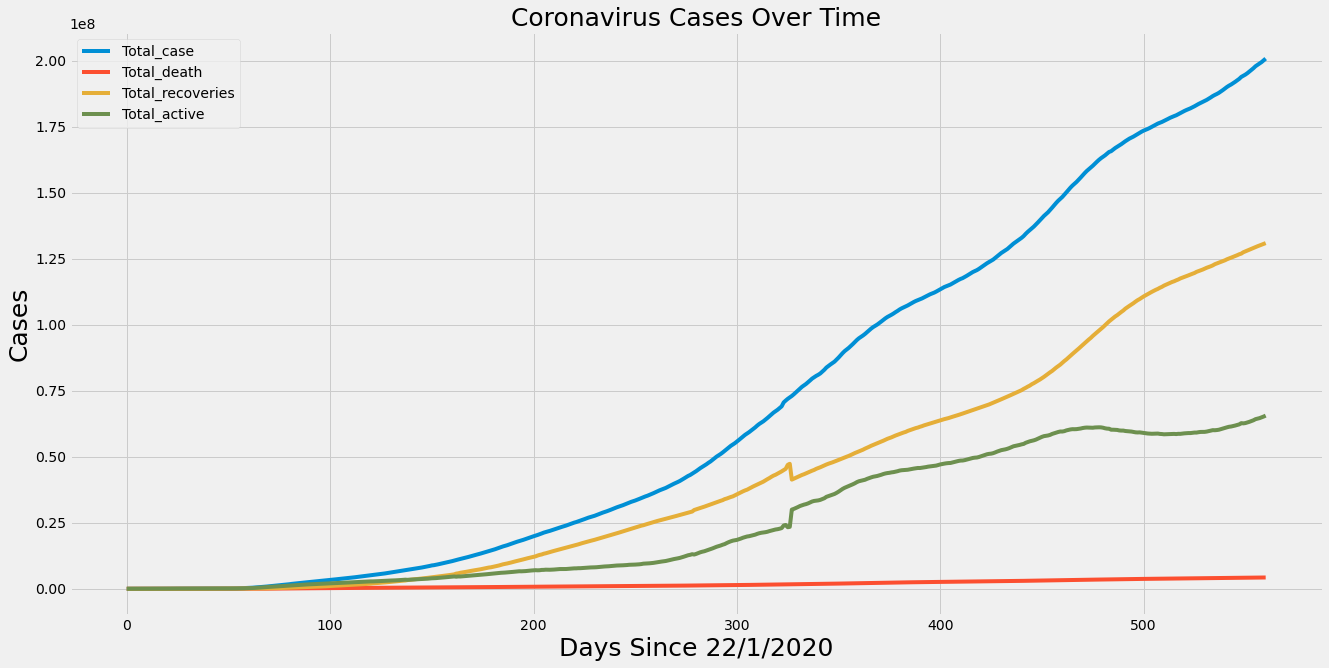

In [28]:
df_covid.plot(kind = 'line', figsize=(20, 10))
plt.xlabel('Days Since 22/1/2020', fontsize=25)
plt.ylabel('Cases',fontsize =25)
plt.title('Coronavirus Cases Over Time',fontsize =25)
plt.show()

In [29]:
df_covid_log10 = np.log10(df_covid)
df_covid_log10.head()

,Total_case,Total_death,Total_recoveries,Total_active
0,2.745855,1.230449,1.477121,2.707570
1,2.817565,1.255273,1.505150,2.783189
2,2.974972,1.414973,1.591065,2.943989
3,3.157457,1.623249,1.623249,3.131298
4,3.326336,1.748188,1.748188,3.302764


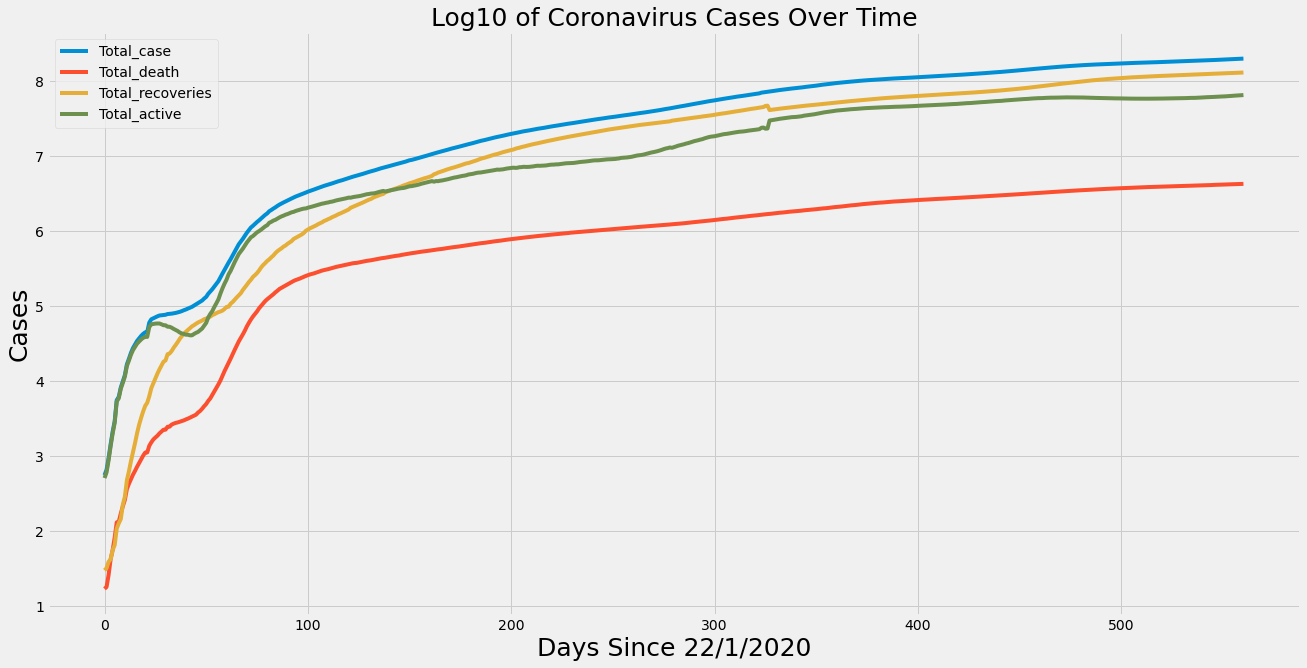

In [30]:
df_covid_log10.plot(kind = 'line', figsize=(20, 10))
plt.xlabel('Days Since 22/1/2020', fontsize=25)
plt.ylabel('Cases',fontsize =25)
plt.title('Log10 of Coronavirus Cases Over Time',fontsize =25)
plt.show()

### Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường

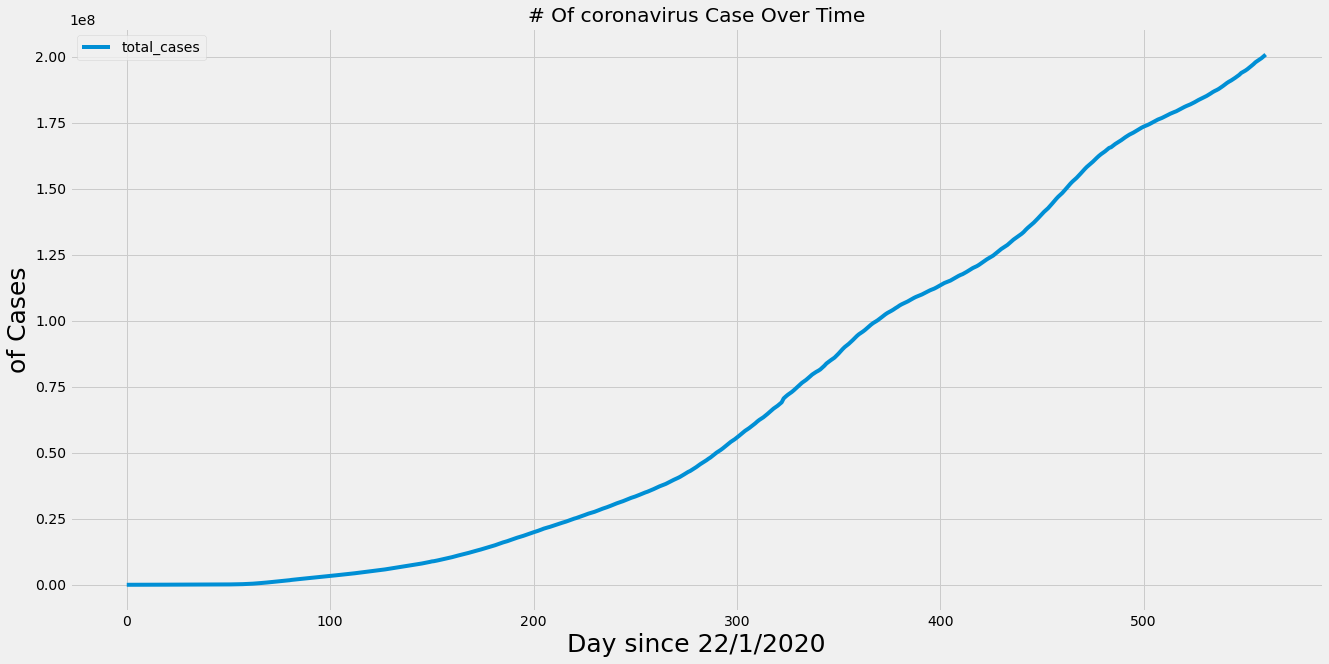

In [31]:
df_total_cases = pd.DataFrame(total_case,
                              index= adjusted_dates,
                              columns= ['total_cases'])
df_total_cases.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Day since 22/1/2020',fontsize = 25)
plt.ylabel('of Cases',fontsize = 25)
plt.title('# Of coronavirus Case Over Time')
plt.show()

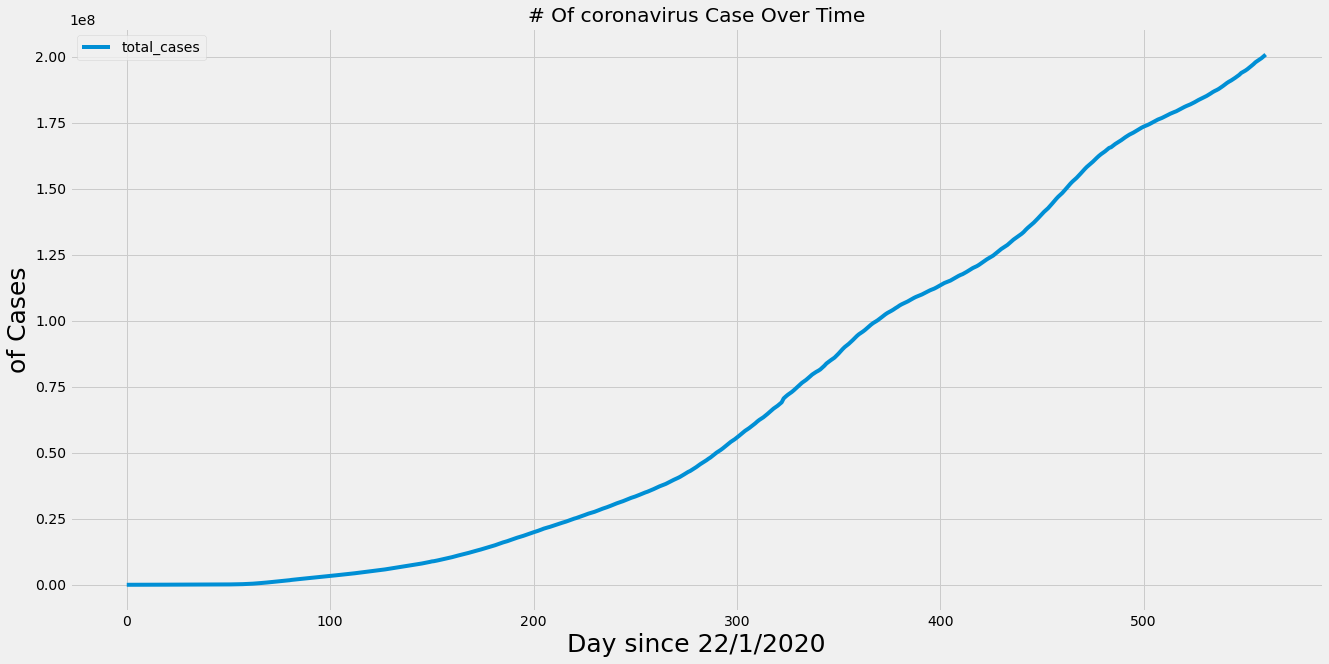

In [32]:
df_total_cases = pd.DataFrame(total_case,
                              index= adjusted_dates,
                              columns= ['total_cases'])
df_total_cases.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Day since 22/1/2020',fontsize = 25)
plt.ylabel('of Cases',fontsize = 25)
plt.title('# Of coronavirus Case Over Time')
plt.show()

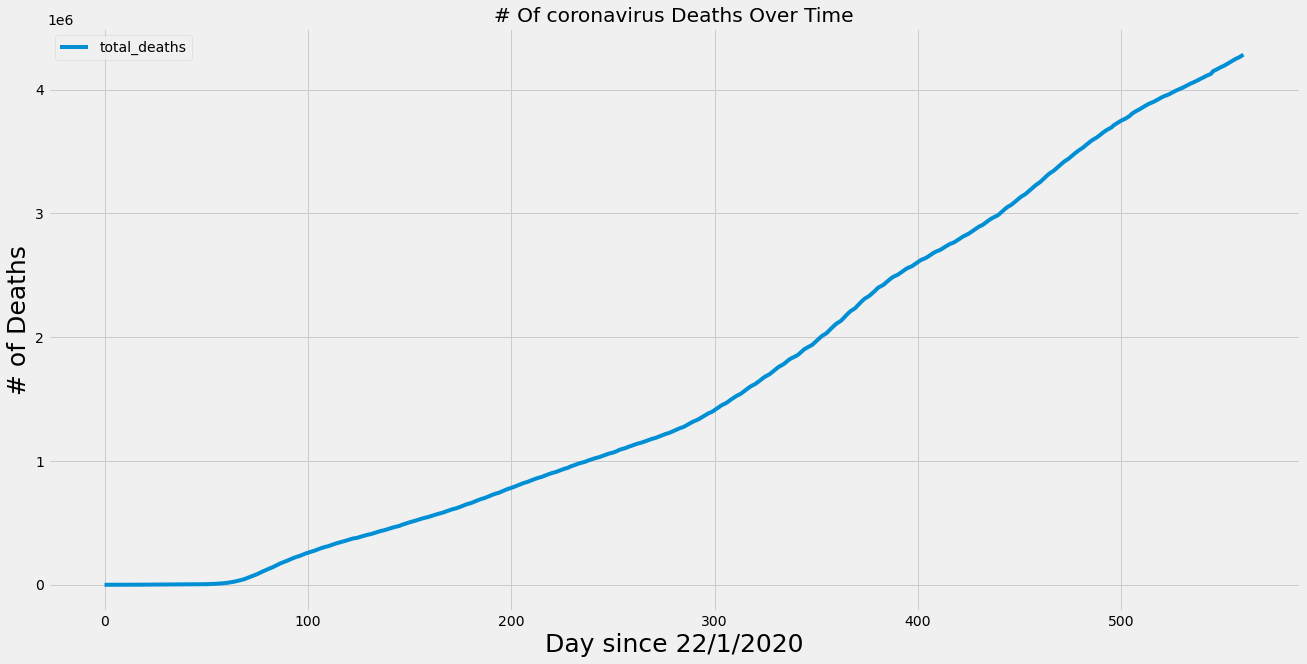

In [33]:
df_total_deaths = pd.DataFrame(total_death,
                               index = adjusted_dates,
                               columns= ['total_deaths'])
df_total_deaths.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Day since 22/1/2020',fontsize = 25)
plt.ylabel('# of Deaths',fontsize = 25)
plt.title('# Of coronavirus Deaths Over Time')
plt.show()

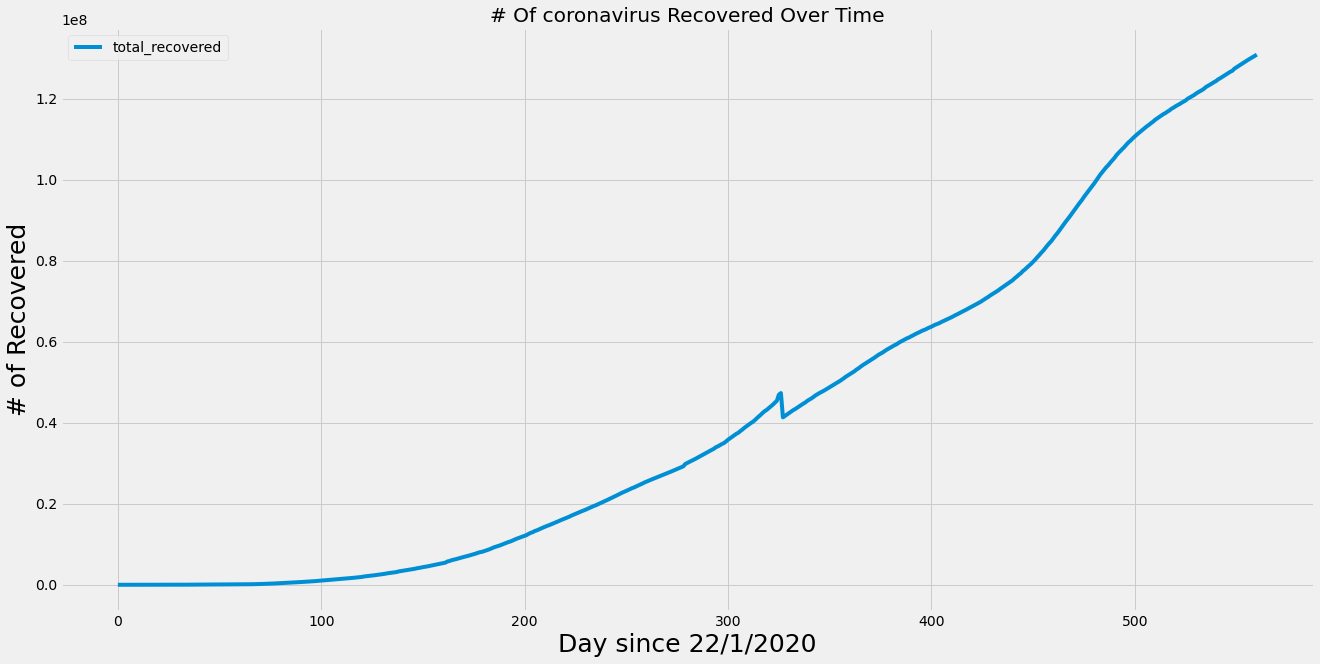

In [34]:
df_total_recorveries = pd.DataFrame(total_recorveries,
                                   index= adjusted_dates,
                                   columns= ['total_recovered'])
df_total_recorveries.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Day since 22/1/2020',fontsize = 25)
plt.ylabel('# of Recovered',fontsize = 25)
plt.title('# Of coronavirus Recovered Over Time')
plt.show()

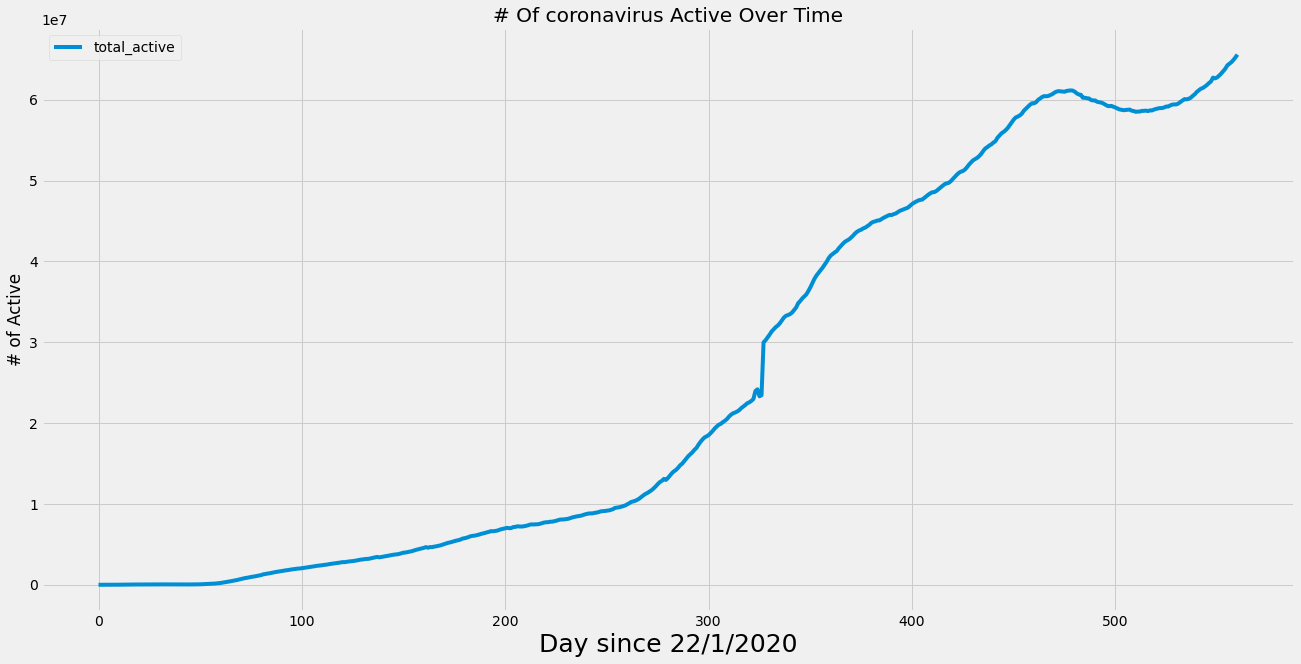

In [35]:
df_total_active = pd.DataFrame(total_active,
                               index= adjusted_dates,
                               columns= ['total_active'])
df_total_active.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Day since 22/1/2020',fontsize = 25)
plt.ylabel('# of Active')
plt.title('# Of coronavirus Active Over Time')
plt.show()

###  Tính số lượng gia tăng hằng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi theo thời gian (đơn vị ngày)

In [36]:
df_covid[0:1]

,Total_case,Total_death,Total_recoveries,Total_active
0,557,17,30,510


In [37]:
df_covid[:-1]

,Total_case,Total_death,Total_recoveries,Total_active
0,557,17,30,510
1,657,18,32,607
2,944,26,39,879
3,1437,42,42,1353
4,2120,56,56,2008
...,...,...,...,...
555,197870188,4237640,129401282,64231266
556,198389868,4246502,129705211,64438155
557,198874996,4253920,129994389,64626687
558,199441649,4262020,130277533,64902096


In [38]:
df_convid_increase_day = pd.concat([df_covid[0:1], df_covid[:-1]], axis = 0, ignore_index=True)
df_convid_increase_day

,Total_case,Total_death,Total_recoveries,Total_active
0,557,17,30,510
1,557,17,30,510
2,657,18,32,607
3,944,26,39,879
4,1437,42,42,1353
...,...,...,...,...
556,197870188,4237640,129401282,64231266
557,198389868,4246502,129705211,64438155
558,198874996,4253920,129994389,64626687
559,199441649,4262020,130277533,64902096


In [39]:
df_convid_increase_daily = df_covid - df_convid_increase_day
df_convid_increase_daily

,Total_case,Total_death,Total_recoveries,Total_active
0,0,0,0,0
1,100,1,2,97
2,287,8,7,272
3,493,16,3,474
4,683,14,14,655
...,...,...,...,...
556,519680,8862,303929,206889
557,485128,7418,289178,188532
558,566653,8100,283144,275409
559,634166,10353,304468,319345


### Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt) 

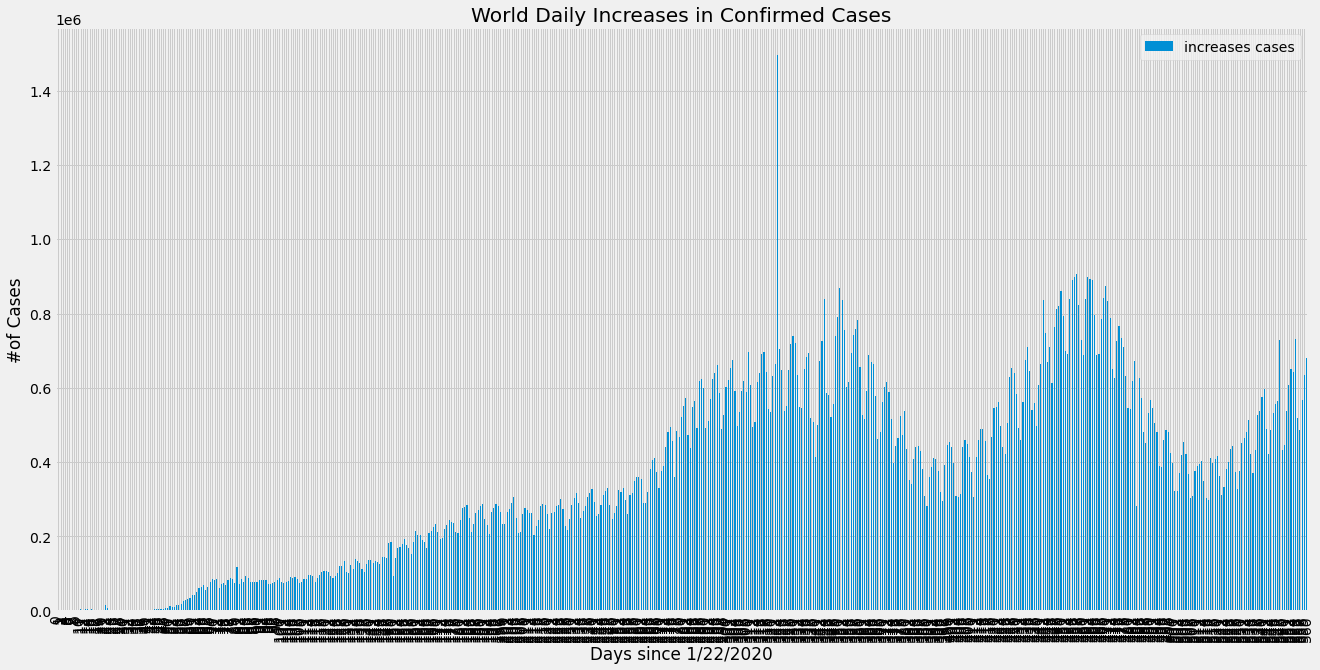

In [40]:
df_convid_increase_daily['Total_case'].plot(kind = 'bar', figsize =(20,10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#of Cases')
plt.title('World Daily Increases in Confirmed Cases')
plt.legend(['increases cases'])
plt.show()

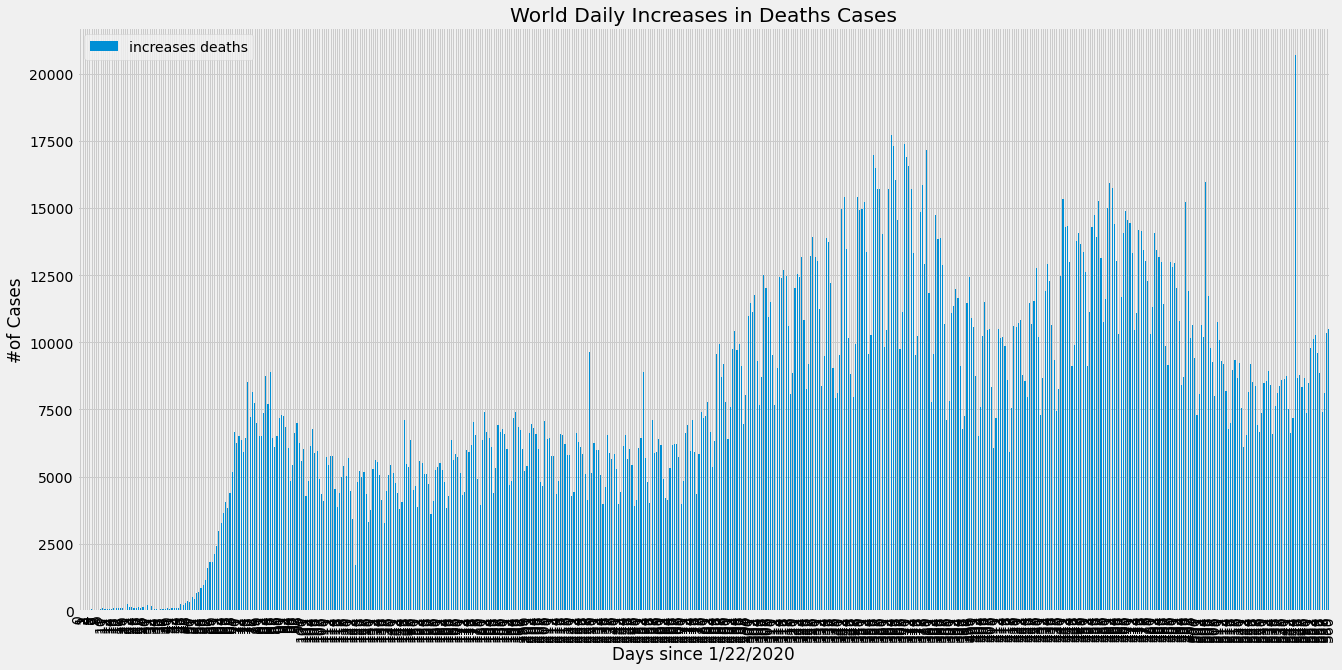

In [41]:
df_convid_increase_daily['Total_death'].plot(kind = 'bar', figsize =(20,10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#of Cases')
plt.title('World Daily Increases in Deaths Cases')
plt.legend(['increases deaths'])
plt.show()

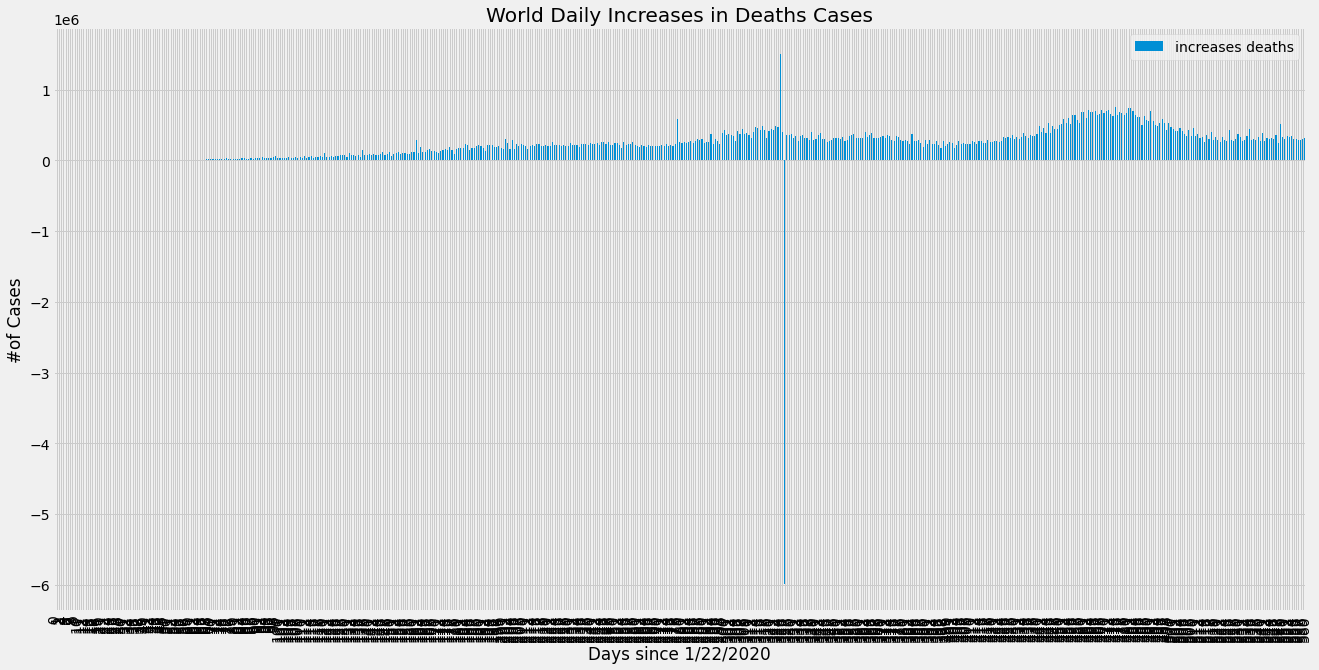

In [42]:
df_convid_increase_daily['Total_recoveries'].plot(kind = 'bar', figsize =(20,10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#of Cases')
plt.title('World Daily Increases in Deaths Cases')
plt.legend(['increases deaths'])
plt.show()

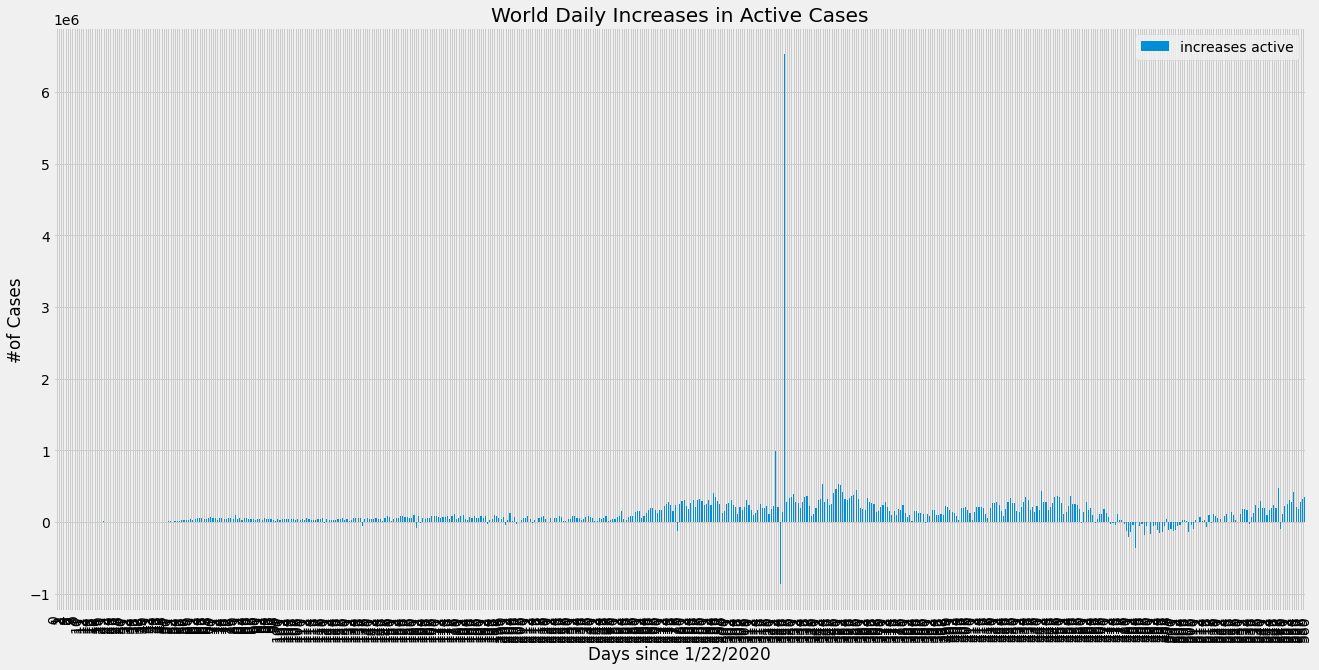

In [43]:
df_convid_increase_daily['Total_active'].plot(kind = 'bar', figsize =(20,10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#of Cases')
plt.title('World Daily Increases in Active Cases')
plt.legend(['increases active'])
plt.show()

### Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.



In [44]:
# Tỷ lệ tử vong toàn cầu:
global_mortality_rate = (df_covid['Total_death'] / df_covid['Total_case']) * 100
print("Tỷ lệ tử vong toàn cầu:")
global_mortality_rate

Tỷ lệ tử vong toàn cầu:


0      3.052065
1      2.739726
2      2.754237
3      2.922756
4      2.641509
         ...   
556    2.140483
557    2.138992
558    2.136976
559    2.135377
560    2.133363
Length: 561, dtype: float64

In [45]:
# Tỷ lệ hồi phục theo thời gian:
recovery_rate_over_time = (df_covid['Total_recoveries'] / df_covid['Total_case']) * 100
print("Tỷ lệ hồi phục theo thời gian: ")
recovery_rate_over_time

Tỷ lệ hồi phục theo thời gian: 


0       5.385996
1       4.870624
2       4.131356
3       2.922756
4       2.641509
         ...    
556    65.378949
557    65.364873
558    65.321127
559    65.266260
560    65.202941
Length: 561, dtype: float64

In [46]:
# Tạo dataframe phần trăm covid
df_covid_percentage = pd.DataFrame(zip(global_mortality_rate, recovery_rate_over_time), 
                                   index=adjusted_dates, 
                                   columns=['mortality_rate','recovered_rate'])
df_covid_percentage

,mortality_rate,recovered_rate
0,3.052065,5.385996
1,2.739726,4.870624
2,2.754237,4.131356
3,2.922756,2.922756
4,2.641509,2.641509
...,...,...
556,2.140483,65.378949
557,2.138992,65.364873
558,2.136976,65.321127
559,2.135377,65.266260


### Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường. Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

In [47]:
# Tỷ lệ tử vong trung bình theo thời gian:
avg_mortality_rate = round(df_covid_percentage['mortality_rate'].mean(), 3)
print('Tỷ lệ tử vong trung bình theo thời gian là:',avg_mortality_rate)
# Tạo ra 1 mảng tỉ lệ tử vong trung bình 
avg_arr_mortality_rate = [avg_mortality_rate for i in range(len(df_covid_percentage['mortality_rate']))]

Tỷ lệ tử vong trung bình theo thời gian là: 3.438


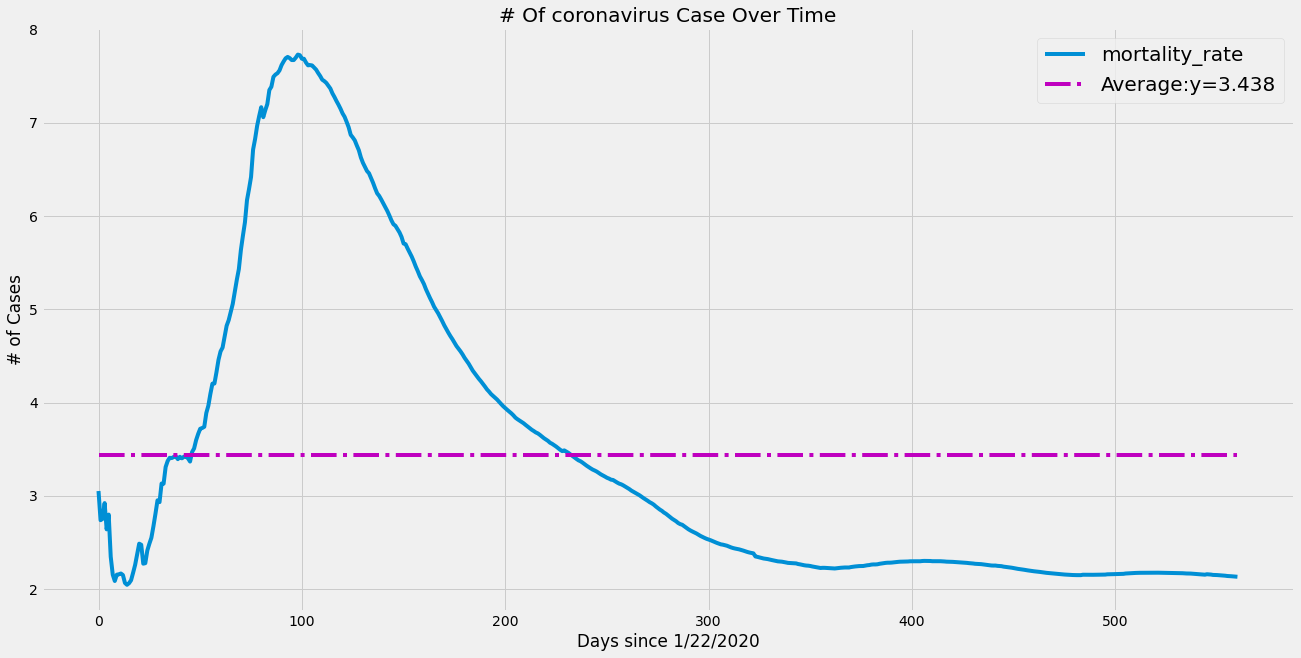

In [48]:
df_covid_percentage['mortality_rate'].plot(kind = 'line', figsize = (20, 10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.title('# Of coronavirus Case Over Time')
#Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.
plt.plot(avg_arr_mortality_rate, ls="-.", color='m', label=f"Average:y={avg_mortality_rate}")
plt.legend(fontsize=20)
plt.show()

### Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường. Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

In [49]:
#Tính tỷ lệ tử vong trung bình theo thời gian
avg_recovery_rate = round(df_covid_percentage['recovered_rate'].mean(), 3)
print("Tỷ lệ tử vong trung bình theo thời gian", avg_recovery_rate)
avg_arr_recovery_rate = [avg_recovery_rate for i in range(len(df_covid_percentage['recovered_rate']))]

Tỷ lệ tử vong trung bình theo thời gian 52.718


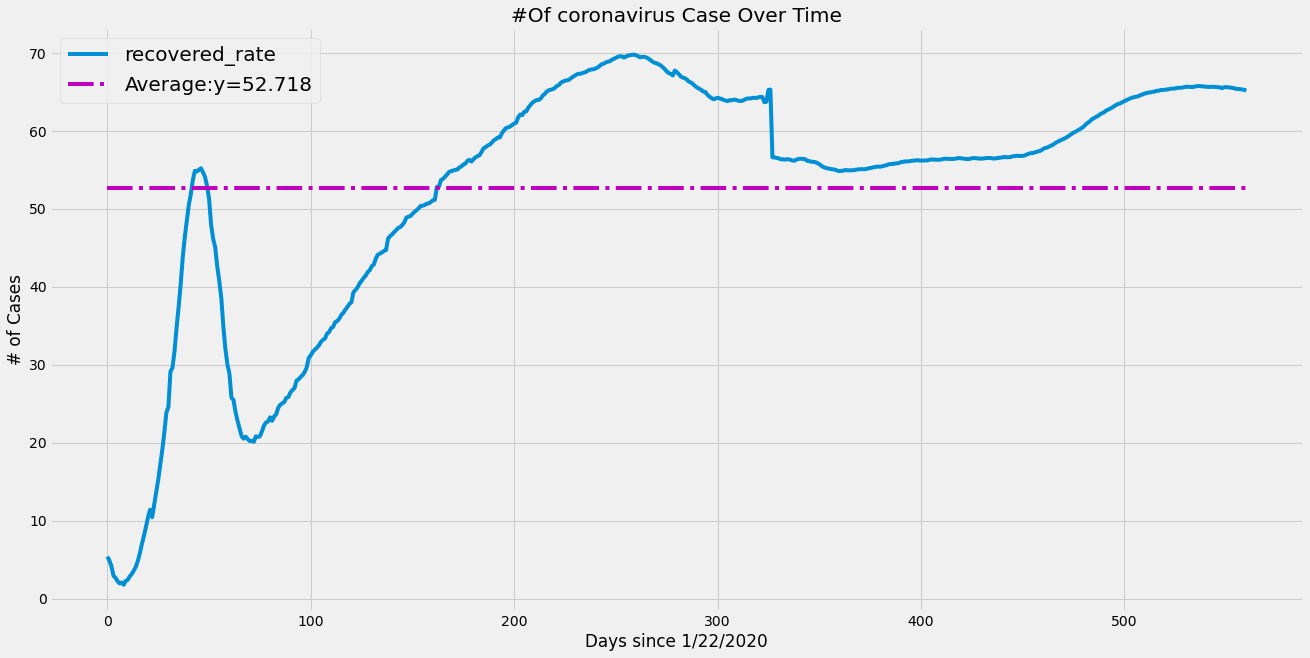

In [50]:
df_covid_percentage['recovered_rate'].plot(kind = 'line',figsize = (20,10))
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.title('#Of coronavirus Case Over Time')
#Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian
plt.plot(avg_arr_recovery_rate, color='m', ls = '-.', label=f"Average:y={avg_recovery_rate}")
plt.legend(fontsize=20)
plt.show()

## $\color{red}{\text{Task 3: Phân tích theo châu lục}}$

### Tiền xử lý dữ liệu
### Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
`pycountry_convert: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.`

In [51]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# Nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


### Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df

In [52]:
#1.confirm_df 
#Add continent into confirm_df
#setting each country to continent
list_conti_code = [country_to_continent_code(country) for country in confirmed_df['Country/Region']]
#get list continent name from list_conti_code
list_continent = [continents[conti_code] for conti_code in list_conti_code]
# Add continent column
confirmed_df['continent'] = list_continent

new_position_continent = ['Province/State','Country/Region','Lat','Long','continent'] + dates
confirmed_df = confirmed_df[new_position_continent]

confirmed_df.head()

,Province/State,Country/Region,Lat,Long,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,Asia,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,Europe,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,Africa,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,Europe,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,Africa,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [53]:
#2.deaths_df
list_conti_death_code = [country_to_continent_code(country) for country in deaths_df['Country/Region']]
#get list continent name from list_conti_code
list_continent_deaths = [continents[conti_death_code] for conti_death_code in list_conti_death_code]
#Add continent column
deaths_df['continent'] = list_continent_deaths
deaths_df = deaths_df[new_position_continent]

deaths_df.head()

,Province/State,Country/Region,Lat,Long,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,Asia,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,Europe,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,Africa,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,Europe,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,Africa,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [54]:
#3.recovered_df
list_conti_reco_code  = [country_to_continent_code(country) for country in recoveries_df['Country/Region']]
#get list continent name from list_contu_code
list_continent_reco = [continents[conti_reco] for conti_reco in list_conti_reco_code]
#Add continent columns
recoveries_df['continent'] = list_continent_reco
recoveries_df = recoveries_df[new_position_continent]

recoveries_df.head()

,Province/State,Country/Region,Lat,Long,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,Asia,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,Europe,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,Africa,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,Europe,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,Africa,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


In [55]:
# Set index for countries infor df
# continent: Country continent.
list_countries = confirmed_df.drop_duplicates(subset=['Country/Region'])
list_countries.set_index(['Country/Region'], inplace=True)
countries_info = list_countries[['Lat', 'Long','continent']]
countries_info

,Lat,Long,continent
Country/Region,,,
Afghanistan,33.939110,67.709953,Asia
Albania,41.153300,20.168300,Europe
Algeria,28.033900,1.659600,Africa
Andorra,42.506300,1.521800,Europe
Angola,-11.202700,17.873900,Africa
...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others
Winter Olympics 2022,39.904200,116.407400,Others
Yemen,15.552727,48.516388,Asia


### Tạo data frame country_df với chỉ mục là trường "Country/Region"<br>
**Các cột thông tin này gồm:**
- continent: Châu lục.
- Confirmed: Tổng số ca mắc.
- Deaths: Tổng số ca tử vong.
- Recoveries: Tổng số ca hồi phục.
- Active: Tổng số ca còn mắc Covid.
- Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.


In [56]:
#confirmed_df
#deaths_df
#recoveries_df
#df_mortality_rate
#df_total_active_increase_daily

#1. Create confirmed cases by country df
list_confirmed = confirmed_df.groupby(['Country/Region']).sum()
countries_confirmed = list_confirmed.iloc[:,-1]

#2. Create deaths case by country df 
list_deaths =deaths_df.groupby(['Country/Region']).sum()
countries_deaths =list_deaths.iloc[:,-1]

#3. Create recoveries case by country df
list_recoveries =recoveries_df.groupby(['Country/Region']).sum()
countries_recoveries = list_recoveries.iloc[:,-1]

In [57]:
# Naming all column above
countries_confirmed.name = 'Confirmed'
countries_deaths.name = 'Deaths'
countries_recoveries.name = 'Recoveries'

# Create requirement table
countries_df = pd.concat([countries_info, countries_confirmed, countries_deaths, countries_recoveries], axis=1) 
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries
Country/Region,,,,,,
Afghanistan,33.939110,67.709953,Asia,148933,6836,82586
Albania,41.153300,20.168300,Europe,133310,2457,130314
Algeria,28.033900,1.659600,Africa,176724,4404,118409
Andorra,42.506300,1.521800,Europe,14797,128,14380
Angola,-11.202700,17.873900,Africa,43158,1026,39582
...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others,317404,3609,312320
Winter Olympics 2022,39.904200,116.407400,Others,0,0,0
Yemen,15.552727,48.516388,Asia,7096,1380,4251


In [58]:
#4. Create df_total_active_incease_daily
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Recoveries']+countries_df['Deaths'])
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active
Country/Region,,,,,,,
Afghanistan,33.939110,67.709953,Asia,148933,6836,82586,59511
Albania,41.153300,20.168300,Europe,133310,2457,130314,539
Algeria,28.033900,1.659600,Africa,176724,4404,118409,53911
Andorra,42.506300,1.521800,Europe,14797,128,14380,289
Angola,-11.202700,17.873900,Africa,43158,1026,39582,2550
...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others,317404,3609,312320,1475
Winter Olympics 2022,39.904200,116.407400,Others,0,0,0,0
Yemen,15.552727,48.516388,Asia,7096,1380,4251,1465


In [59]:
#5. Create mortality rate by country df 
countries_df['motality_rate'] = round(countries_df['Deaths']*100/countries_df['Confirmed'],2)
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,148933,6836,82586,59511,4.59
Albania,41.153300,20.168300,Europe,133310,2457,130314,539,1.84
Algeria,28.033900,1.659600,Africa,176724,4404,118409,53911,2.49
Andorra,42.506300,1.521800,Europe,14797,128,14380,289,0.87
Angola,-11.202700,17.873900,Africa,43158,1026,39582,2550,2.38
...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others,317404,3609,312320,1475,1.14
Winter Olympics 2022,39.904200,116.407400,Others,0,0,0,0,NaN
Yemen,15.552727,48.516388,Asia,7096,1380,4251,1465,19.45


In [60]:
# Check error value 
countries_df[countries_df['Active'] < 0]                  # Active column contain 2 negative value

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
Austria,47.516200,14.55010,Europe,655955,13147,644388,-1580,2.00
Guyana,4.860416,-58.93018,South America,22643,549,22327,-233,2.42
Peru,-9.190000,-75.01520,South America,2119068,196673,2086086,-163691,9.28


In [61]:
# There are 3 countries with wrong data are: Austria, Guyana, Peru. Drop them! 
countries_df.drop(['Guyana', 'Peru','Austria'], inplace=True)       # Drop Three countries have an Error data

# Check the error value again
countries_df[countries_df['Active'] < 0] 

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,


In [62]:
 # Check missing data
countries_df.isna().sum()                    # Mortality Rate column contain 1 missing value

Lat              0
Long             0
continent        0
Confirmed        0
Deaths           0
Recoveries       0
Active           0
motality_rate    7
dtype: int64

In [63]:
countries_df.dropna(inplace=True)            # Drop nan rows
countries_df.isna().sum() 

Lat              0
Long             0
continent        0
Confirmed        0
Deaths           0
Recoveries       0
Active           0
motality_rate    0
dtype: int64

In [64]:
countries_df['continent']

Country/Region
Afghanistan             Asia
Albania               Europe
Algeria               Africa
Andorra               Europe
Angola                Africa
                       ...  
Vietnam                 Asia
West Bank and Gaza    Others
Yemen                   Asia
Zambia                Africa
Zimbabwe              Africa
Name: continent, Length: 191, dtype: object

### Tạo data frame continents_df với chỉ mục là trường "continent"
**Các cột thông tin này gồm:**
- Confirmed: Tổng số ca mắc.
- Deaths: Tổng số ca tử vong.
- Recoveries: Tổng số ca hồi phục.
- Active: Tổng số ca còn mắc Covid.
- Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [65]:
# Groupby dataframe by continent
continent_confirmed = confirmed_df.groupby('continent').sum()
continent_deaths = deaths_df.groupby('continent').sum()
continent_recoveries = recoveries_df.groupby('continent').sum()

In [66]:
# Sum total confirmed, total deaths, total recoveries by continent in the latest day 
df_confirmed = continent_confirmed.iloc[:,-1]
df_deaths = continent_deaths.iloc[:,-1]
df_recoveries = continent_recoveries.iloc[:,-1]
df_active  = df_confirmed -(df_deaths + df_recoveries)
continent_mortality_rate = round(df_deaths*100/df_confirmed,2)

In [67]:
# Naming three Series above
df_confirmed.name = 'Confirmed'
df_deaths.name = 'Deaths'
df_recoveries.name = 'Recoveries'
df_active.name ='Active'
continent_mortality_rate.name = 'Mortality Rate'

# Create continents dataframe
continents_df = pd.concat([df_confirmed, df_deaths, df_recoveries, df_active, continent_mortality_rate], axis=1) 
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902753,57853343,3780630,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167112,27947075,23334358,2.23
North America,42349750,924591,5776939,35648220,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


### Hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận.

In [68]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

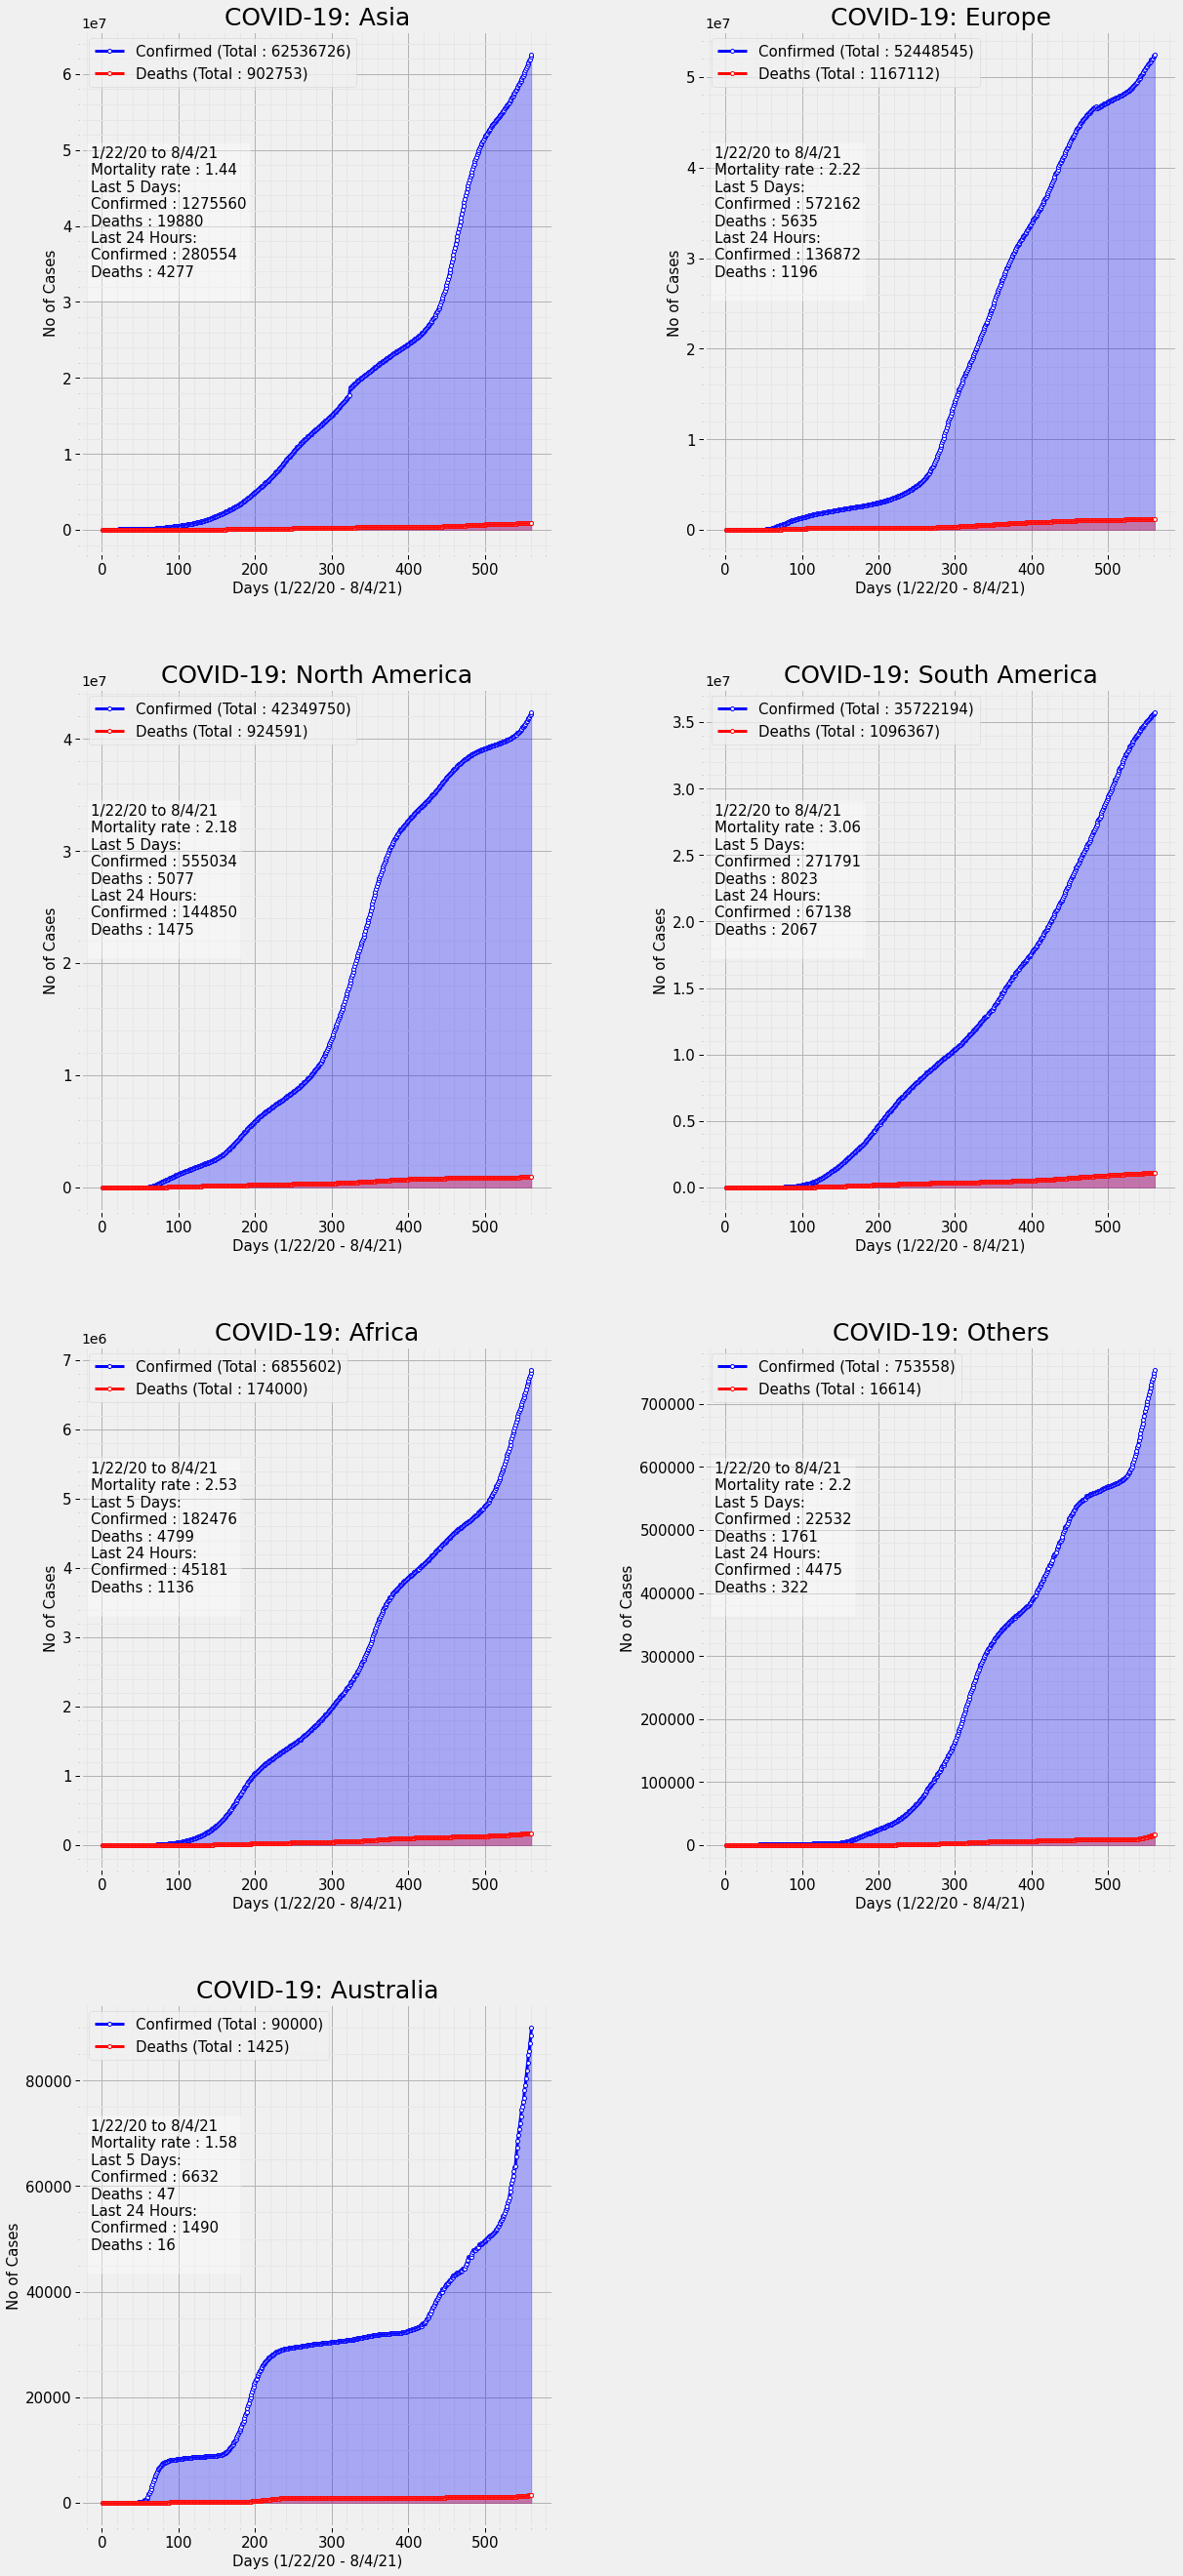

In [69]:
# Create 7 subplots
figure = plt.figure(figsize = (20,40))

fig1=[figure, 4, 2, 1]
fig2=[figure, 4, 2, 2]
fig3=[figure, 4, 2, 3]
fig4=[figure, 4, 2, 4]
fig5=[figure, 4, 2, 5]
fig6=[figure, 4, 2, 6]
fig7=[figure, 4, 2, 7]

visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['AS'] , country = None , state = None, period = None, figure =fig1,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['EU'] , country = None , state = None, period = None, figure =fig2,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['NA'] , country = None , state = None, period = None, figure =fig3,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['SA'] , country = None , state = None, period = None, figure =fig4,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['AF'] , country = None , state = None, period = None, figure =fig5,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['na'] , country = None , state = None, period = None, figure =fig6,
                          scale = "linear")
visualize_covid_cases_5(confirmed_df, deaths_df,
                          continents['OC'] , country = None , state = None, period = None, figure =fig7,
                          scale = "linear")

### Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử     vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.

`Lưu ý: Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.`

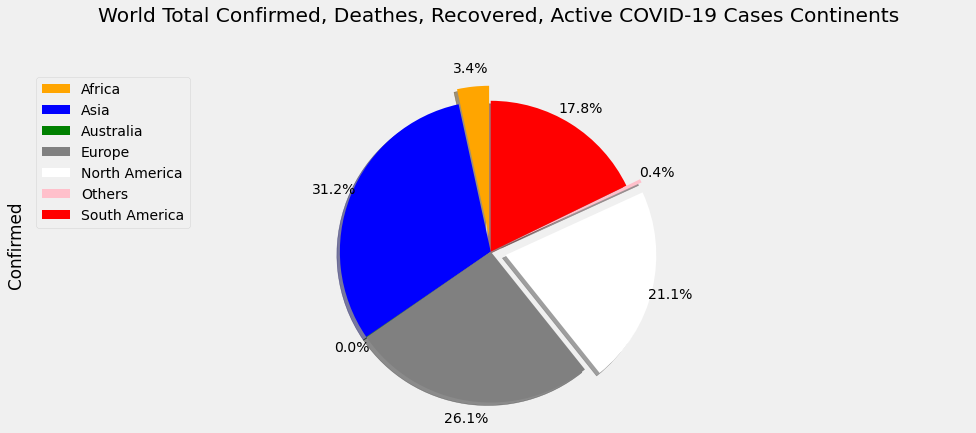

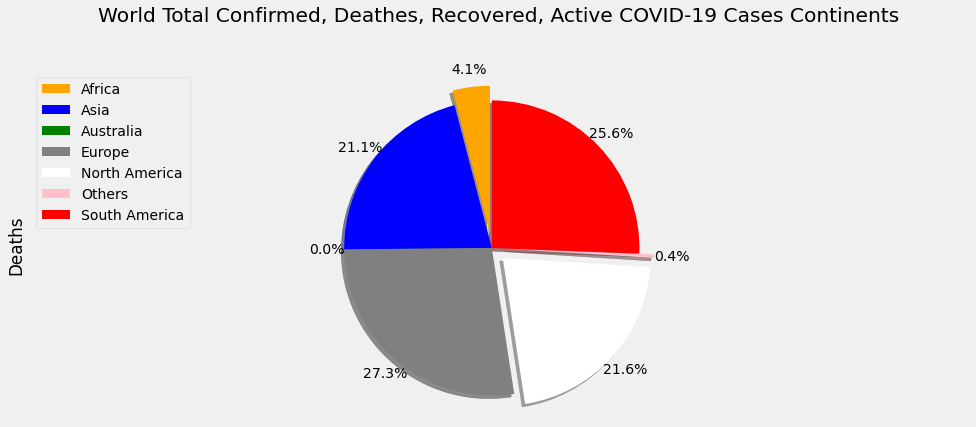

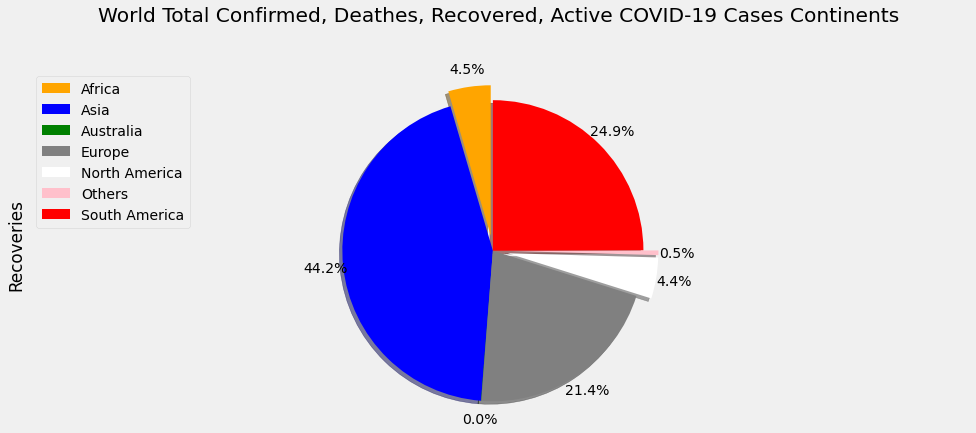

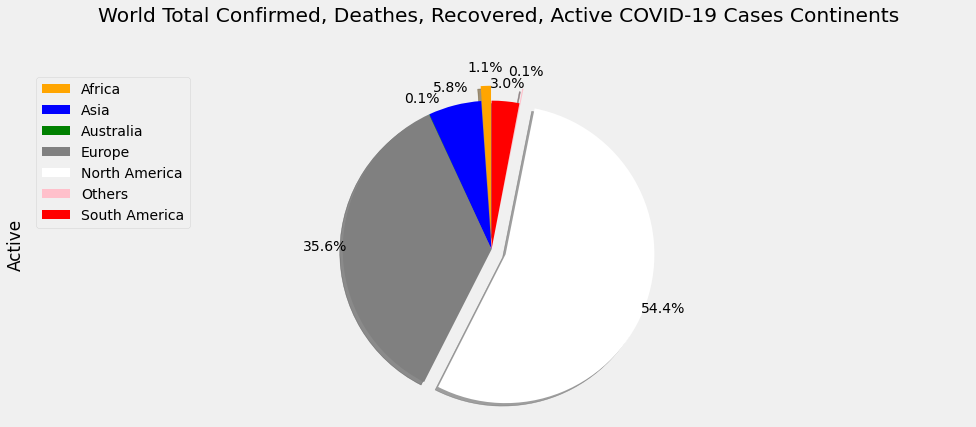

In [70]:
colors_list = ['orange','blue','green','gray','white','pink','red']
columns = ['Confirmed','Deaths','Recoveries','Active']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

for column in columns:
    f = plt.figure(figsize=(20, 40))
    ax = f.add_subplot(111)
    #Ploting the pie chart
    continents_df[column].plot(kind='pie',figsize=(15, 6),colors=colors_list,autopct='%1.1f%%',
                               startangle=90,shadow=True,labels=None,pctdistance=1.12,
                               ax=ax,explode=explode_list)
    
    #scale the title up by 12% to match pctdistance
    plt.title('World Total Confirmed, Deathes, Recovered, Active COVID-19 Cases Continents', y=1.12) 
    plt.axis('equal') 
    # add legend
    plt.legend(labels=continents_df.index, loc='upper left') 
plt.show()

In [71]:
label = ['Asia', 'Oceania', 'Europe', 'na', 'North America', 'Africa', 'South America']
data_confirmed  = continents_df['Confirmed']
data_deaths     = continents_df['Deaths']
data_recoveries = continents_df['Recoveries']
data_active     = continents_df['Active']

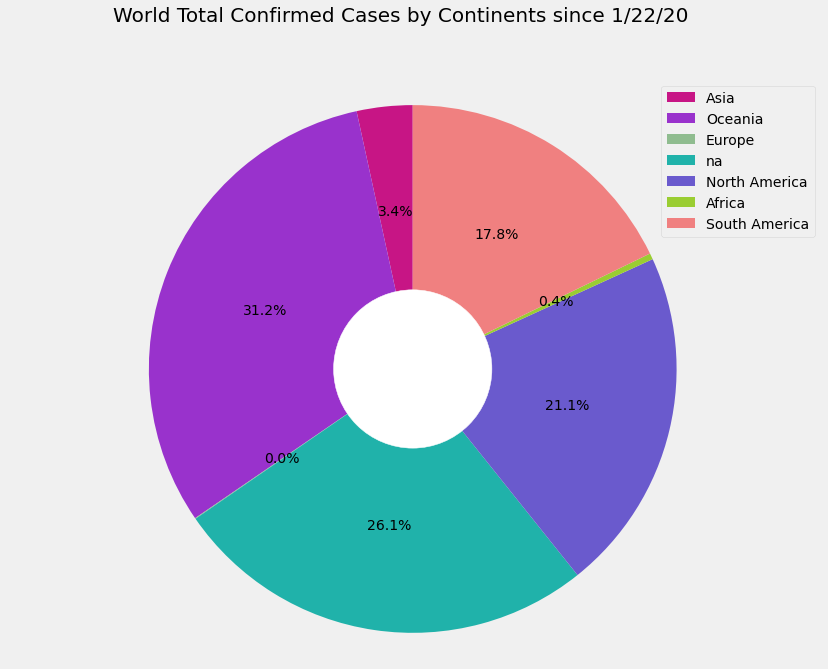

In [72]:
#confirmed
lst_colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral']
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_confirmed, autopct='%1.1f%%',startangle=90, colors = lst_colors)
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Confirmed Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

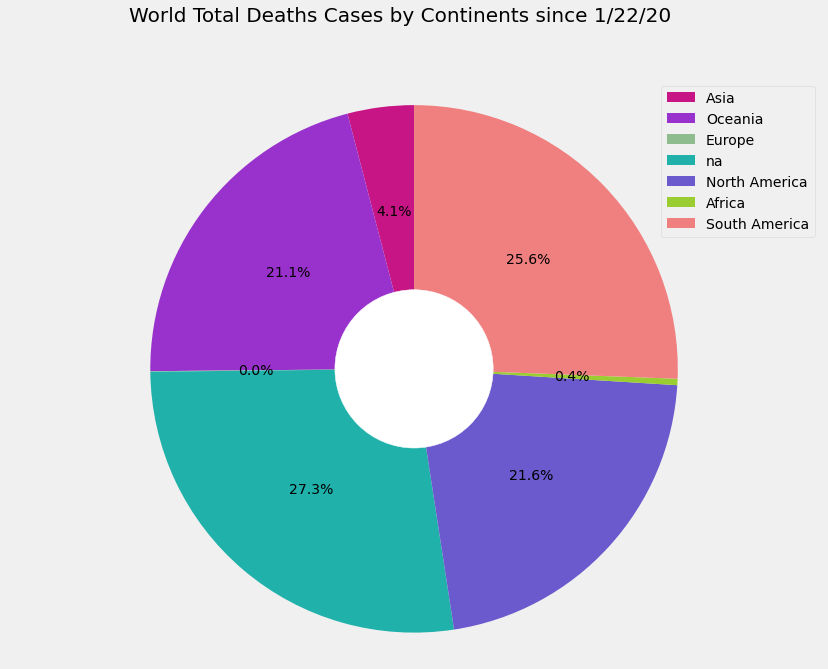

In [73]:
# deaths
lst_colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral']
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_deaths, autopct='%1.1f%%',startangle=90, colors = lst_colors)
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Deaths Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

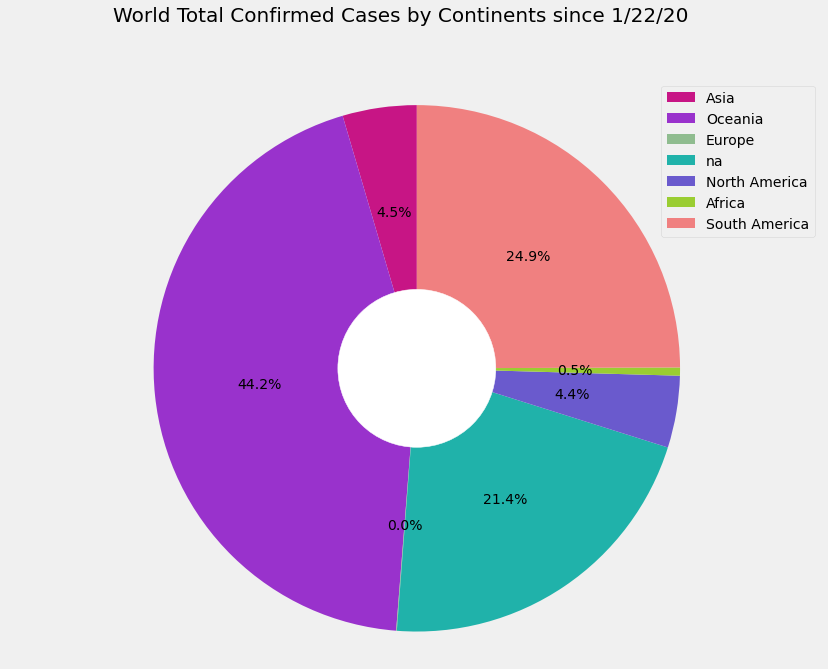

In [74]:
#recovered
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_recoveries, autopct='%1.1f%%',startangle=90, colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Confirmed Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

## $\color{red}{\text{Task 4: Phân tích theo quốc gia}}$

### Xây dựng bản đồ `folium` để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.

In [75]:
# Tạo bản đồ folium
word_map = folium.Map(location=[20,0], tiles="CartoDB Positron", zoom_start=2)

# Hiển thị bản đồ
word_map

In [76]:
for i in range(len(countries_df)):
    #  get information for each Country 
    country_name = countries_df.index[i]
    latitude = countries_df.iloc[i]['Lat']
    longtitude = countries_df.iloc[i]['Long']
    confirmed = countries_df.iloc[i]['Confirmed']
    deaths = countries_df.iloc[i]['Deaths']
    recoveries = countries_df.iloc[i]['Recoveries']
    mortality_rate = countries_df.iloc[i]['motality_rate']

    
    folium.Circle(
        location=[latitude, longtitude],
        radius=float(confirmed)/100,
        color='#fc0703',
        fill=True,
#         fill_color='#FC7F03',
#         color="crimson",
        fill_color="#34cc31",
        popup="Covid 19 is so dangerous",
    ).add_to(word_map)

word_map


### Xây dựng bản đồ `px [(plotly.express)] `để hiển thị số ca còn mắc Covid của mỗi quốc gia trong $log(10)$ dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [77]:
countries_active_cases = countries_df[['Lat', 'Long', 'Active']].copy()

# Remove all 0 value in Active column
countries_active_cases['Active'].replace(0, np.NaN, inplace=True)
countries_active_cases.dropna(inplace=True)

#exchange active to int to call log10 function 
countries_active_cases['Active'].astype('int64')

# Calculate log10 of Countries's Activie Case
countries_active_cases['Log10 Active'] = np.log10(countries_active_cases['Active'])

# Ploting log 10 Active case by countries
fig = px.scatter_geo(countries_active_cases, lat='Lat', lon='Long', color=countries_active_cases.index, 
                     hover_name=countries_active_cases.index, size='Log10 Active')

fig.update_layout(title="Log 10 Active Cases by Countries",
                  legend_title_text='Country')
# fig.update_layout(template='plotly_dark')

fig.show()

### Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [78]:
top10_confirmed_countries = countries_df.sort_values(by='Confirmed',ascending=False).head(10)
top10_confirmed_countries

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
USA,40.000000,-100.000000,North America,35458563,611295,0,34847268,1.72
India,20.593684,78.962880,Asia,31812114,426290,30974748,411076,1.34
Brazil,-14.235000,-51.925300,South America,20034407,559944,17771228,1703235,2.79
Russia,61.524010,105.318756,Europe,6274006,159032,5609682,505292,2.53
France,3.933900,-53.125800,Europe,6272466,112245,415111,5745110,1.79
United Kingdom,18.220600,-63.068600,Europe,5980830,157181,24693,5798956,2.63
Turkey,38.963700,35.243300,Asia,5822487,51767,5478185,292535,0.89
Argentina,-38.416100,-63.616700,South America,4975616,106747,4615834,253035,2.15
Colombia,4.570900,-74.297300,South America,4815063,121695,4615354,78014,2.53


### Trực quan hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

In [79]:
x = top10_confirmed_countries.index
# Create figure
fig1 = go.Figure()

# Create trace for each categories
trace0 = go.Bar(x=x, y=top10_confirmed_countries['Deaths'], name ='Deaths')
trace1 = go.Bar(x=x, y=top10_confirmed_countries['Recoveries'], name ='Recoveries')
trace2 = go.Bar(x=x, y=top10_confirmed_countries['Active'], name ='Active')

# Adding trace to figure
fig1.add_trace(trace0)
fig1.add_trace(trace1)
fig1.add_trace(trace2)

# Setting layout
fig1.update_layout(barmode='stack', 
                  title="Top 10 Countries (Confirmed Cases)",
                  xaxis_title="Country",
                  yaxis_title="# of Cases")
# fig1.update_layout(template='plotly_dark')

fig1.update_xaxes(tickangle=25)

# Show plot
fig1.show()

## $\color{red}{\text{Task 5: Phân tích nâng cao}}$

### Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?

<b>Trả lời :</b>
 - Dựa vào bài toán 2, nhìn vào biểu đồ đường thì thấy các đường `confirmed, deaths, recovered, active` đều xu hướng tăng. Cho nên data từ ngày $20/1/2020$ vẫn chưa đạt đến đỉnh điểm của dịch.

### Dựa trên trực quan hóa dữ liệu của châu lục:
- 1. Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?
- 2. Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
- 3. Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?


In [80]:
continents_df['Death Rate %'] = (continents_df['Deaths']/continents_df['Deaths'].sum()) * 100
continents_df.sort_values(by = 'Death Rate %',ascending=False).head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %
continent,,,,,,
Europe,52448545,1167112,27947075,23334358,2.23,27.250750
South America,35722194,1096367,32656668,1969159,3.07,25.598934
North America,42349750,924591,5776939,35648220,2.18,21.588158
Asia,62536726,902753,57853343,3780630,1.44,21.078265
Africa,6855602,174000,5955131,726471,2.54,4.062704


#### 1. Châu lục có tỷ lệ tử vong cao nhất theo số ca mắc châu lục là: $Europe$

In [81]:
continents_df['Active Rate %'] =(continents_df['Active']/continents_df['Active'].sum())*100 
continents_df.sort_values('Active Rate %',ascending =False).head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate %
continent,,,,,,,
North America,42349750,924591,5776939,35648220,2.18,21.588158,54.362971
Europe,52448545,1167112,27947075,23334358,2.23,27.250750,35.584526
Asia,62536726,902753,57853343,3780630,1.44,21.078265,5.765401
South America,35722194,1096367,32656668,1969159,3.07,25.598934,3.002936
Africa,6855602,174000,5955131,726471,2.54,4.062704,1.107857


#### 2. North America là châu lục có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục 

In [82]:
continents_df['Recovered Rate %'] = (continents_df['Recoveries']/continents_df['Recoveries'].sum()) * 100
continents_df.sort_values(by = 'Recovered Rate %',ascending=False).head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate %,Recovered Rate %
continent,,,,,,,,
Asia,62536726,902753,57853343,3780630,1.44,21.078265,5.765401,44.196912
South America,35722194,1096367,32656668,1969159,3.07,25.598934,3.002936,24.947977
Europe,52448545,1167112,27947075,23334358,2.23,27.250750,35.584526,21.350096
Africa,6855602,174000,5955131,726471,2.54,4.062704,1.107857,4.549407
North America,42349750,924591,5776939,35648220,2.18,21.588158,54.362971,4.413278


#### 3. Asia có tỉ lệ phục hồi cao nhất trong tập dữ liệu các châu lục

### Dựa trên trực quan hóa dữ liệu theo quốc gia:
- 1. Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?
- 2. Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
- 3. Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?


In [83]:
#1. Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

#The death rate of each country 
countries_df['Death Rate %'] = (countries_df['Deaths']/countries_df['Deaths'].sum()) * 100

countries_df.sort_values('Death Rate %', ascending = False).head(1)

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %
Country/Region,,,,,,,,,
USA,40.0,-100.0,North America,35458563,611295,0,34847268,1.72,15.010339


In [84]:
# 2. Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?

#The spread rate of each country 
countries_df['Active Rate %'] = (countries_df['Active']/countries_df['Active'].sum()) * 100

countries_df.sort_values('Active Rate %', ascending = False).head(1)

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %
Country/Region,,,,,,,,,,
USA,40.0,-100.0,North America,35458563,611295,0,34847268,1.72,15.010339,53.007745


In [85]:
# 3. Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?

#The recoveries rate of each country 
countries_df['Recoveries Rate %'] = (countries_df['Recoveries']/countries_df['Recoveries'].sum()) * 100

countries_df.sort_values('Recoveries Rate %', ascending = False).head(1)

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %,Recoveries Rate %
Country/Region,,,,,,,,,,,
India,20.593684,78.96288,Asia,31812114,426290,30974748,411076,1.34,10.467544,0.625306,24.171402


<p><b>Trả lời:</b></p>

 - **USA** là nước chiếm `tỉ lệ tử vong` cao nhất trên thế giới.
 - **USA** là nước có `tỷ lệ lây lan` COVID 2019 cao nhất theo với tập dữ liệu các quốc gia.
 - **India** là nước có `tỷ lệ hồi phục` cao nhất theo tập dữ liệu của các quốc gia.

## $\color{red}{\text{DASH BOARH}}$

### Nhóm thực hiện:
- Hiện thực 2 biểu đồ lên dashboarh:
    - Số ca còn mắc Covid của mỗi quốc gia trong  𝑙𝑜𝑔(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ"
    - 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau
- Sử dụng được một số thao tác để cho dashboard linh động hơn<br>
` Lưu ý: Nhóm có cài tài khoản và mật khẩu để vào dashboarh:`<br>
- *Tài Khoản:* **nhom6**
- *Mật khẩu:* **maidinh**
                                                                 

#### Cài thư viện để sử dụng dash

In [86]:
# !pip install dash
# !pip install dash-renderer
# !pip install dash_html_components
# !pip install dash_core_components
# !pip install jupyter-dash
# !pip install dash_bootstrap_components
# !pip install dash_auth
# !pip install dash-enterprise-auth

In [87]:
from dash import Dash, html, Input, Output, callback, dash_table
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_enterprise_auth as auth
import dash_auth
from collections import OrderedDict


df_log10 = pd.DataFrame(
        OrderedDict([(name, col_data * 10) for (name, col_data) in countries_active_cases.items()]))

# ----------------Tài khoản và mật khẩu khi vào local DASH----------------------
VALID_USERNAME_PASSWORD_PAIRS = {
    'nhom6': 'maidinh'
}

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

auth = dash_auth.BasicAuth(
    app,
    VALID_USERNAME_PASSWORD_PAIRS
)
#--------------------------------------------------------------------------------
app.layout = html.Div([
    html.Div([],className='col-1'),
    html.Div([
        html.Div([
            html.H1("Bản đồ plotly với Dash"),
            html.H4("Nhóm 6 - Dữ Liệu COVID-19"),
            
                 ],className="col-md-12 text-center bg-success text-white", style = {"margin-bottom":"50px"}),
#-----------------------------------
    html.H5("Dữ liệu trường hợp hoạt động theo quốc gia", 
            style ={'textAlign':'center',
                    'color': 'blue'}),
    dash_table.DataTable(
        data = df_log10.to_dict('records'),
        columns=[{'id': c, 'name': c} for c in df_log10.columns],
        page_size=20,
        style_table={'height': '300px', 'overflowY': 'auto'}
    ),
        
#-------------------------------------  
    html.H5('Số ca còn mắc Covid của mỗi quốc gia trong 𝑙𝑜𝑔(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ"',
           className="col-md-12 text-success"),
    html.Div([
                html.Div([],className='col-1'),
                html.H4('Country/Region:', className = "text-primary"),
                html.Div(children=[
                                dcc.Checklist(
                                    options = np.array(countries_active_cases.index),
                                    value=[],
                                    id = "check",
                                    style = {"display": "flex", 
                                             "flex-direction":"column", 
                                             'width': '200px', 'height': '500px', 'overflow-y': 'scroll'}),
                                dcc.Graph(id = 'log10', figure = fig, style={'flex': '1', 'height': '550px'}),
                                ], 
                         className="col-9", style={'display': 'flex'})
            ], 
        className='row', style = {"margin-bottom":"50px"}),
#--------------------------------------------------------------------------------
    dbc.Container([
    html.H5('Dữ liệu 10 quốc gia hàng đầu dựa trên số ca được xác nhận', 
            style ={'textAlign':'center',
                    'color': 'blue'}),
    dash_table.DataTable(top10_confirmed_countries.to_dict('records'),[{"name": i, "id": i} for i in top10_confirmed_countries.columns], id='tbl'),
    dbc.Alert(id='tbl_out'),
    ]),
#-------------------------------------------------------------------------------
    html.H5('Mười quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau',
            className="col-md-12 text-success"),
        
    html.Div([
        html.Div([],className='col-1'),
            html.Div([
                html.H4('Categories:', className = "text-primary"),
                dcc.Dropdown(
                    id = "dropdown",
                    options = ["All", "Deaths", "Recoveries", "Active"],
                    value = "All",
                    clearable=False,
                ),
                dcc.Graph(id="graph"),
                    ], className="col-9")], className='row')
        
    ],className='col-10')
    
],className="row")

#----------------------------Top 10 Countries (Confirmed Cases)--------------------------------------
@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(option):
    colors = {'Deaths': 'red', "Recoveries": 'green', "Active": 'yellow'}
    traces = [top10_confirmed_countries[option]] if option != 'All' else [top10_confirmed_countries[t] for t in ["Deaths", "Recoveries", "Active"]]
    fig1 = go.Figure()
    for trace in traces:
        data = px.bar(trace).update_traces(marker={'color': colors[trace.name]}).data
        fig1.add_traces(data)
    
    fig1.update_layout(barmode='stack',
                  title = "Top 10 confirmed countries with cases of "+ option,
                  xaxis_title="Country",
                  yaxis_title="# of Cases")
    fig1.update_layout(template='ggplot2')
    fig1.update_xaxes(tickangle=25)
    return fig1

#------------------------Log 10 Active Cases by Countries----------------------------------------
@app.callback(Output('log10', 'figure'), 
              Input('check', 'value'))

def update_countries_(country_names):
    targets = ['Lat', 'Long', 'Active']
    countries_active_cases = pd.DataFrame(data=[countries_df[target][country_names] for target in targets]).T
    # Remove all 0 value in Active column
    countries_active_cases['Active'].replace(0, np.NaN, inplace=True)
    countries_active_cases.dropna(inplace=True)

    #exchange active to int to call log10 function 
    countries_active_cases['Active'].astype('int64')

    # Calculate log10 of Countries's Activie Case
    countries_active_cases['Log10 Active'] = np.log10(countries_active_cases['Active'])

    # Ploting log 10 Active case by countries
    fig = px.scatter_geo(countries_active_cases, lat='Lat', lon='Long', color=countries_active_cases.index, 
                         hover_name=countries_active_cases.index, size='Log10 Active')

    fig.update_layout(title="Log 10 Active Cases by Countries")
    return fig

@callback(Output('tbl_out', 'children'), Input('tbl', 'active_cell'))
def update_graphs(active_cell):
    return str(active_cell) if active_cell else "Click the table" 

# ------------Start_APP----------------------
app.run_server(debug=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11340\2860809800.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

e:\Anaconda3\lib\site-packages\dash_auth\plotly_auth.py:16: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Nov/2022 23:35:05] "GET / HTTP/1.1" 401 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2022 23:35: